# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [2]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [3]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [4]:
apple['Date'].astype('datetime64[ns]')

0      2014-07-08
1      2014-07-07
2      2014-07-03
3      2014-07-02
4      2014-07-01
5      2014-06-30
6      2014-06-27
7      2014-06-26
8      2014-06-25
9      2014-06-24
10     2014-06-23
11     2014-06-20
12     2014-06-19
13     2014-06-18
14     2014-06-17
15     2014-06-16
16     2014-06-13
17     2014-06-12
18     2014-06-11
19     2014-06-10
20     2014-06-09
21     2014-06-06
22     2014-06-05
23     2014-06-04
24     2014-06-03
25     2014-06-02
26     2014-05-30
27     2014-05-29
28     2014-05-28
29     2014-05-27
          ...    
8435   1981-01-26
8436   1981-01-23
8437   1981-01-22
8438   1981-01-21
8439   1981-01-20
8440   1981-01-19
8441   1981-01-16
8442   1981-01-15
8443   1981-01-14
8444   1981-01-13
8445   1981-01-12
8446   1981-01-09
8447   1981-01-08
8448   1981-01-07
8449   1981-01-06
8450   1981-01-05
8451   1981-01-02
8452   1980-12-31
8453   1980-12-30
8454   1980-12-29
8455   1980-12-26
8456   1980-12-24
8457   1980-12-23
8458   1980-12-22
8459   198

In [5]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date', inplace = True)

In [7]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [8]:
apple.index.is_unique?

Type:        bool
String form: True
Docstring:  
bool(x) -> bool

Returns True when the argument x is true, False otherwise.
The builtins True and False are the only two instances of the class bool.
The class bool is a subclass of the class int, and cannot be subclassed.


In [9]:
apple.index.is_unique

True

In [12]:
apple.index.unique()

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)

In [11]:
# all values are unique

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [13]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [14]:
apple[apple.index<='1980-12-31'].mean()

Open         3.048154e+01
High         3.056769e+01
Low          3.044308e+01
Close        3.044308e+01
Volume       2.586252e+07
Adj Close    4.730769e-01
dtype: float64

### Step 9. Get the last business day of each month

- [pandas resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

freq 인수로 특정한 날짜만 생성되도록 할 수도 있다. 많이 사용되는 freq 인수값은 다음과 같다.
- s: 초
- T: 분
- H: 시간
- D: 일(day)
- B: 주말이 아닌 평일
- W: 주(일요일)
- W-MON: 주(월요일)
- M: 각 달(month)의 마지막 날
- MS: 각 달의 첫날
- BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
- BMS: 주말이 아닌 평일 중에서 각 달의 첫날
- WOM-2THU: 각 달의 두번째 목요일
- Q-JAN: 각 분기의 첫달의 마지막 날
- Q-DEC: 각 분기의 마지막 달의 마지막 날
- 출처 : https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/

In [15]:
apple_month = apple.resample('BM').mean()
apple_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
1981-05-29,29.052000,29.188000,28.995000,28.995000,7.380240e+06,0.452500
1981-06-30,30.801818,30.876364,30.703636,30.703636,1.080189e+07,0.477727
1981-07-31,24.436364,24.531818,24.374545,24.374545,7.584436e+06,0.379545
1981-08-31,22.336500,22.386500,22.218500,22.218500,6.857760e+06,0.345000


In [16]:
print(len(apple_month))

404


### Step 10.  What is the difference in days between the first day and the oldest

In [17]:
apple.index.max()

Timestamp('2014-07-08 00:00:00')

In [18]:
apple.index.min()

Timestamp('1980-12-12 00:00:00')

In [19]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [20]:
apple_months = apple.resample('BM').mean()
apple_months

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
1981-05-29,29.052000,29.188000,28.995000,28.995000,7.380240e+06,0.452500
1981-06-30,30.801818,30.876364,30.703636,30.703636,1.080189e+07,0.477727
1981-07-31,24.436364,24.531818,24.374545,24.374545,7.584436e+06,0.379545
1981-08-31,22.336500,22.386500,22.218500,22.218500,6.857760e+06,0.345000


In [21]:
apple_months.index

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-10-31', '2013-11-29', '2013-12-31', '2014-01-31',
               '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-30',
               '2014-06-30', '2014-07-31'],
              dtype='datetime64[ns]', name='Date', length=404, freq='BM')

In [22]:
len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

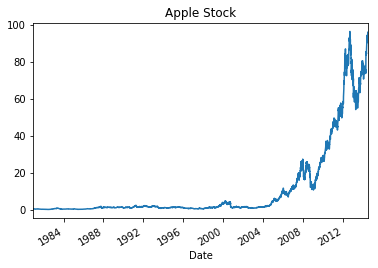

In [23]:
apple['Adj Close'].plot(title = 'Apple Stock')

In [24]:
import seaborn as sns

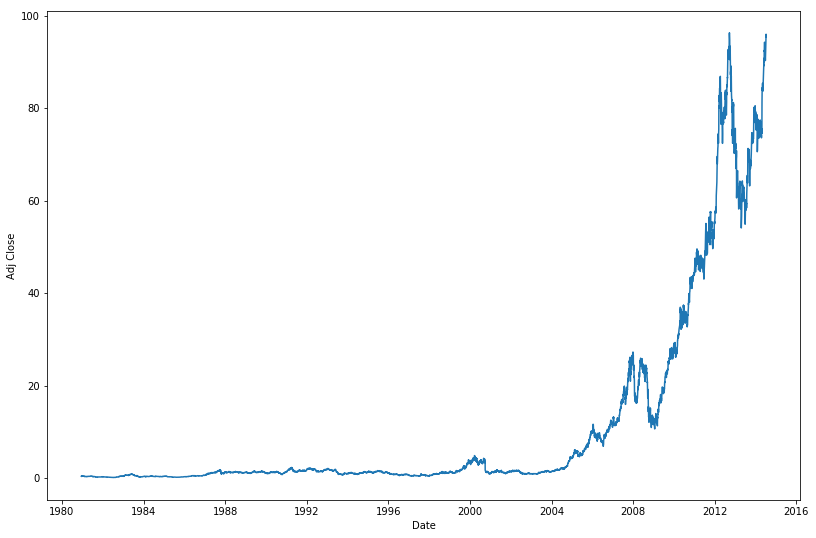

In [25]:
plt.figure(figsize = (13.5 , 9))
sns.lineplot(x = apple.index, y = apple['Adj Close'])

### BONUS: Create your own question and answer it.